In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls

gdrive	sample_data


In [11]:
!ls '/content/gdrive/My Drive/project belote/yolo epoch 30/runs/classify/train2/weights/'

best.pt  last.pt


In [12]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 8.7 MB/s eta 0:00:00


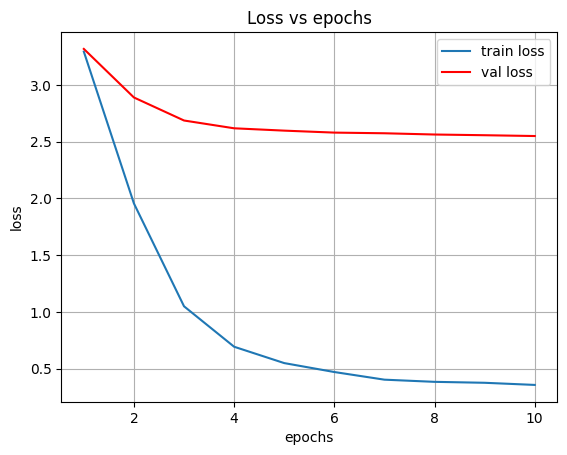

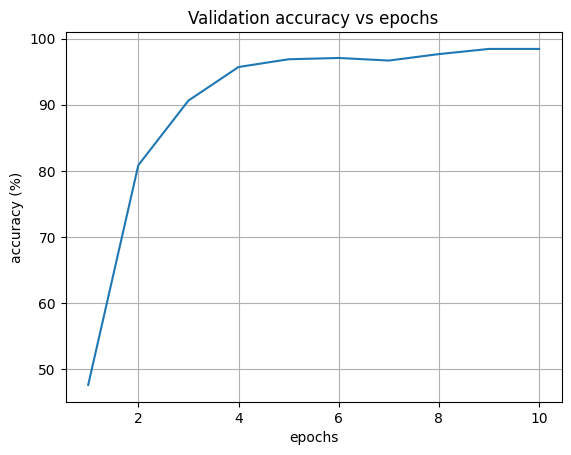

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = '/content/gdrive/My Drive/project belote/yolo epoch 30/runs/classify/train2/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [15]:
from ultralytics import YOLO

import numpy as np

model = YOLO('/content/gdrive/My Drive/project belote/yolo epoch 30/runs/classify/train2/weights/best.pt')  # load a custom model


In [16]:
DATA_DIR = '/content/gdrive/My Drive/Data_cards_split/'

results = model('/content/gdrive/My Drive/Data_cards_split/val/chbada_4/IMG_20240226_123553.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /content/gdrive/My Drive/Data_cards_split/val/chbada_4/IMG_20240226_123553.jpg: 64x64 chbada_4 1.00, copas_neuf 0.00, chbada_5 0.00, chbada_las 0.00, chbada_rey 0.00, 26.2ms
Speed: 162.1ms preprocess, 26.2ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
{0: 'chbada_4', 1: 'chbada_5', 2: 'chbada_cabal', 3: 'chbada_dix', 4: 'chbada_las', 5: 'chbada_neuf', 6: 'chbada_rey', 7: 'chbada_sota', 8: 'copas_4', 9: 'copas_5', 10: 'copas_cabal', 11: 'copas_dix', 12: 'copas_las', 13: 'copas_neuf', 14: 'copas_rey', 15: 'copas_sota', 16: 'dheb_4', 17: 'dheb_5', 18: 'dheb_cabal', 19: 'dheb_dix', 20: 'dheb_las', 21: 'dheb_neuf', 22: 'dheb_rey', 23: 'dheb_sota', 24: 'k7el_4', 25: 'k7el_5', 26: 'k7el_cabal', 27: 'k7el_dix', 28: 'k7el_las', 29: 'k7el_neuf', 30: 'k7el_rey', 31: 'k7el_sota'}
[0.9999324083328247, 9.006499567476567e-06, 1.3414723980531562e-06, 2.6133382107218495e-06, 7.8631637734361e-06, 1.932607460730651e-07, 4.345993602328235e-06, 2.878755651636311e-07, 2.0346789

In [17]:
DATA_DIR = '/content/gdrive/My Drive/Data_cards_split/'

results = model('/content/gdrive/My Drive/Data_cards_split/train/chbada_4/IMG_20240226_111614.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /content/gdrive/My Drive/Data_cards_split/train/chbada_4/IMG_20240226_111614.jpg: 64x64 chbada_4 1.00, chbada_las 0.00, chbada_5 0.00, chbada_rey 0.00, k7el_las 0.00, 4.7ms
Speed: 119.5ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
{0: 'chbada_4', 1: 'chbada_5', 2: 'chbada_cabal', 3: 'chbada_dix', 4: 'chbada_las', 5: 'chbada_neuf', 6: 'chbada_rey', 7: 'chbada_sota', 8: 'copas_4', 9: 'copas_5', 10: 'copas_cabal', 11: 'copas_dix', 12: 'copas_las', 13: 'copas_neuf', 14: 'copas_rey', 15: 'copas_sota', 16: 'dheb_4', 17: 'dheb_5', 18: 'dheb_cabal', 19: 'dheb_dix', 20: 'dheb_las', 21: 'dheb_neuf', 22: 'dheb_rey', 23: 'dheb_sota', 24: 'k7el_4', 25: 'k7el_5', 26: 'k7el_cabal', 27: 'k7el_dix', 28: 'k7el_las', 29: 'k7el_neuf', 30: 'k7el_rey', 31: 'k7el_sota'}
[0.9999035596847534, 1.4543687939294614e-05, 4.404638275445905e-06, 1.400974838361435e-06, 4.338996222941205e-05, 1.3381544761159603e-07, 1.1176499356224667e-05, 2.2374113086698344e-06, 1.70014

In [19]:
test_dir = '/content/gdrive/My Drive/Data_cards_split/test'
#label= {0: 'chbada_4', 1: 'chbada_5', 2: 'chbada_cabal', 3: 'chbada_dix', 4: 'chbada_las', 5: 'chbada_neuf', 6: 'chbada_rey', 7: 'chbada_sota', 8: 'copas_4', 9: 'copas_5', 10: 'copas_cabal', 11: 'copas_dix', 12: 'copas_las', 13: 'copas_neuf', 14: 'copas_rey', 15: 'copas_sota', 16: 'dheb_4', 17: 'dheb_5', 18: 'dheb_cabal', 19: 'dheb_dix', 20: 'dheb_las', 21: 'dheb_neuf', 22: 'dheb_rey', 23: 'dheb_sota', 24: 'k7el_4', 25: 'k7el_5', 26: 'k7el_cabal', 27: 'k7el_dix', 28: 'k7el_las', 29: 'k7el_neuf', 30: 'k7el_rey', 31: 'k7el_sota'}
real = []
predicted = []

for dirname, _, filenames in os.walk(test_dir):
    if (dirname!= test_dir):
        for filename in filenames:
          #print('real value', os.path.basename(dirname))
          real.append(os.path.basename(dirname))

          results = model(os.path.join(dirname,filename))  # predict on an image
          names_dict = results[0].names
          probs = results[0].probs.data.tolist()
          # print(names_dict)
          # print(probs)
          print('real value: ', os.path.basename(dirname),'---------predicted value: ',names_dict[np.argmax(probs)])
          predicted.append(names_dict[np.argmax(probs)])
          print('----------------------------')


# len(true_value)
#label


image 1/1 /content/gdrive/My Drive/Data_cards_split/test/chbada_4/IMG_20240226_111552.jpg: 64x64 chbada_4 1.00, chbada_las 0.00, chbada_5 0.00, k7el_las 0.00, copas_neuf 0.00, 7.7ms
Speed: 122.9ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
real value:  chbada_4 ---------predicted value:  chbada_4
----------------------------

image 1/1 /content/gdrive/My Drive/Data_cards_split/test/chbada_4/IMG_20240226_121949.jpg: 64x64 chbada_4 1.00, chbada_las 0.00, chbada_5 0.00, copas_neuf 0.00, chbada_rey 0.00, 5.0ms
Speed: 186.7ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
real value:  chbada_4 ---------predicted value:  chbada_4
----------------------------

image 1/1 /content/gdrive/My Drive/Data_cards_split/test/chbada_4/IMG_20240226_122008.jpg: 64x64 chbada_4 1.00, copas_neuf 0.00, k7el_las 0.00, chbada_las 0.00, chbada_5 0.00, 13.7ms
Speed: 365.9ms preprocess, 13.7ms inference, 0.1ms postprocess per image at shape 

In [21]:
count=0
for i in range(len(predicted)):  # only take first element of dataset
    true_label = real[i]
    predicted_label = predicted[i]
    #print(true_label,'--',label[prediction_index[i]])
    print('real value: ', true_label,'---------predicted value: ',predicted_label)
    if(true_label==predicted_label):
        count+=1

real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  chbada_4 ---------predicted value:  chbada_4
real value:  c

In [22]:
print(count, len(predicted))

631 640
